D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기
• csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
• 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화 합니다.

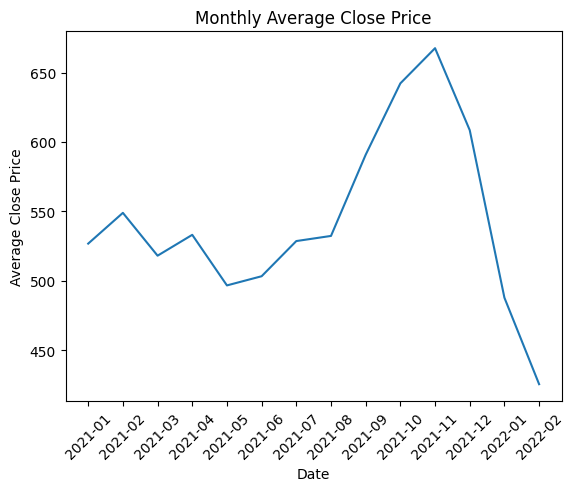

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# 주가 정보를 불러옵니다.
df = pd.read_csv('NFLX.csv', usecols=[0, 4])
df_after_2021 = df[df['Date'] > '2021-01']
index_list = list(df_after_2021['Date'])

# yyyy-mm 형식의 데이터로 가공합니다.
new_index = [0] * len(index_list)
for i in range(len(index_list)):
    tmp = index_list[i].split('-')
    new_index[i] = tmp[0] + '-' + tmp[1]

# 새로 만들어진 날짜 리스트를 인덱스로 설정합니다.
df_after_2021.loc[:, 'Date'] = new_index

# 날짜를 기준으로 데이터를 묶어 평균을 계산합니다.
df_after_2021 = df_after_2021.groupby('Date')['Close'].mean()

# 그래프로 나타냅니다.
plt.plot(df_after_2021)
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.show()
